In [37]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

### Relational Databases

1.In a Relational DB, Data about entities is organized into tables

2.Tables can be linked to each other via unique keys

3.Each row or record is an instance of an entity. Each column has information about an an attribute. Data types are specified
for each column.

4.Support more data, multiple simultaneous users, and data quality controls

5.SQL (Structured Query Language) to interact with databases

### SQL order of keywords

1.SELECT

2.FROM

3.JOIN

4.WHERE

5.GROUP BY

### Connecting to Databases

It's a Two-step process:

1.Create way to connect to database

2.Query database


### Ex 1: Connect to a database

In order to get data from a database with pandas, you first need to be able to connect to one.

1.In this exercise, you'll practice creating a database engine to manage connections to a database, `data.db`. To do this, you'll use sqlalchemy's `create_engine()` function.

2.`create_engine()` needs a `string URL` to the database. For `SQLite` databases, that string consists of `"sqlite:///"`, then the database `file name`.

3.Show the names of the tables in the database using `table_names()` function.

In [4]:
# Create the database engine

engine = create_engine("sqlite:///data.db")

In [5]:
# View the tables in the database

engine.table_names()

<ipython-input-5-1baa15571d0b>:3: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['boro_census', 'hpd311calls', 'weather']

### Ex 2: Load entire tables

In the last exercise, you saw that `data.db` has three tables. `weather` has historical weather data for New York City. `hpd311calls` is a subset of call records made to the city's 311 help line about housing issues.

In this exercise, you'll use the `read_sql()` function in pandas to `load` both tables. `read_sql()` accepts a `string` of either a SQL query to run, or a table to load.

1.Use `read_sql()` to load the entire `hpd311calls` table by `name`, `without` any SQL query.

2.Use `read_sql()` and load the entire weather table by `using`SQL query.

In [12]:
# Load hpd311calls without any SQL

hpd_calls = pd.read_sql("hpd311calls", engine)
hpd_calls.head()

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN


In [8]:
# Load weather with the SQL query

weather = pd.read_sql("SELECT * FROM weather", engine)
weather.head()

,station,name,latitude,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/01/2017,December,5.37,0.00,0.0,,52,42
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/02/2017,December,3.13,0.00,0.0,,48,39
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/03/2017,December,2.01,0.00,0.0,,48,42
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/04/2017,December,3.58,0.00,0.0,,51,40
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/05/2017,December,6.71,0.75,0.0,,61,50


### Refining imports with SQL queries

Query basics:

`SELECT [column_names] FROM [table_name] WHERE [condition];`

Datasets can contain columns that are `not required` for an analysis, like the weather table in `data.db` does. Some, such as elevation, are redundant.

### Ex 3:

In this exercise you will--

1.Write a SQL `query` that `SELECT`s the `date`, `tmax`, and `tmin` columns from the `weather` table

2.Make a data frame by passing the query and engine to `read_sql()` and assign the resulting data frame to `temperatures`.


In [13]:
# Write a SQL query that SELECTs the date, tmax, and tmin columns from the weather table

query = """ SELECT date, tmax, tmin FROM weather"""

In [15]:
temperatures = pd.read_sql(query,engine)
temperatures.head()

,date,tmax,tmin
0,12/01/2017,52,42
1,12/02/2017,48,39
2,12/03/2017,48,42
3,12/04/2017,51,40
4,12/05/2017,61,50


### Selecting rows

SQL `WHERE` clauses return records whose values meet the given `criteria`. Passing such a query to read_sql() results in a data frame loaded with only records we are interested in, so there is less filtering to do later on.

### Ex 4 : 

The `hpd311calls` table in `data.db` has data on calls about various `housing issues`, from `maintenance problems` to `information requests`.In this exercise you will--

1.Create a `query` that `selects` all `columns` of records in `hpd311calls` that have `'SAFETY'` as their `complaint_type`

2.Use `read_sql()` to query the database and assign the result to the variable `safety_calls`.


In [16]:
query = """ SELECT * FROM hpd311calls WHERE complaint_type == 'SAFETY' """

In [17]:
safety_calls = pd.read_sql(query, engine)
safety_calls.head()

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough
0,38078679,01/01/2018,HPD,SAFETY,11221,192 MALCOLM X BOULEVARD,03 BROOKLYN,BROOKLYN
1,38077515,01/01/2018,HPD,SAFETY,11225,410 EASTERN PARKWAY,09 BROOKLYN,BROOKLYN
2,38073165,01/01/2018,HPD,SAFETY,10457,1975 BATHGATE AVENUE,06 BRONX,BRONX
3,38081081,01/01/2018,HPD,SAFETY,10457,1515 SELWYN AVENUE,04 BRONX,BRONX
4,38081146,01/01/2018,HPD,SAFETY,10457,1515 SELWYN AVENUE,04 BRONX,BRONX


### Filtering on multiple conditions

1.WHERE clauses with AND return records that meet all conditions

2.WHERE clauses with OR return records that meet at least one condition

So far, you've selectively imported records that met a single condition, but it's also common to filter datasets on multiple criteria. 

### Ex 5: 

The weather table contains daily `high and low` temperatures and precipitation amounts for `New York City`. Let's focus on inclement weather, where there was either an inch or more of snow or the high was at or below freezing (32° Fahrenheit). To do this, you'll need to build a query that uses the `OR` operator to look at values in both columns.

1.Create a `query` that selects records in `weather` where `tmax` is `less than or equal` to `32 degrees` OR `snow` is `greater than or equal` to `1 inch`.

2.Use read_sql() to query the database and assign the result to the variable `wintry_days`.

3.View summary statistics with the `describe()` method to make sure all records in the data frame meet the given criteria.

In [26]:
query = """ SELECT * FROM weather WHERE tmax <= 32 OR snow >= 1; """

In [27]:
wintry_days = pd.read_sql(query, engine)
wintry_days.head()

,station,name,latitude,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/09/2017,December,4.25,0.46,4.6,,35,30
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/13/2017,December,10.74,0.00,0.0,,31,20
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/14/217,December,5.82,0.09,1.2,,32,22
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/15/2017,December,3.80,0.11,1.2,,28,20
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/26/2017,December,8.72,0.00,0.0,,28,23


### Getting distinct values

Sometimes an analysis doesn't need every record, but rather `unique` values in one or more columns. `Duplicate` values can be `removed` after loading data into a data frame, but it can also be done at import with SQL's `DISTINCT` keyword. We can Get unique values for one or more columns with `SELECT DISTINCT`

### Ex 6: 

In this exercise you will--

1.Create a `query` that gets `DISTINCT` values for `borough` and `complaint_type` (in that order) from `hpd311calls`.

2.Use read_sql() to load the results of the query to a data frame, issues_and_boros.

3.Print the data frame to check if the assumption that all issues besides literature requests appear with boroughs listed.

In [28]:
# Create a query that gets DISTINCT values for borough and complaint_type (in that order) from hpd311calls

query = ''' SELECT DISTINCT borough, complaint_type FROM hpd311calls '''

In [29]:
# Use read_sql() to load the results of the query to a data frame, issues_and_boros.

issues_and_boros = pd.read_sql(query, engine)
issues_and_boros.head()

,borough,complaint_type
0,BRONX,HEAT/HOT WATER
1,MANHATTAN,PLUMBING
2,MANHATTAN,HEAT/HOT WATER
3,BROOKLYN,HEAT/HOT WATER
4,QUEENS,HEAT/HOT WATER


### More complex SQL queries

We can Query a database directly for descriptive statistics by `Aggregate functions`, like -
`SUM`, `AVG`, `MAX`, `MIN`, `COUNT`.

1.`SUM, AVG, MAX, MIN` : Each takes a single column name. For Example-

`SELECT AVG(tmax) FROM weather;`

2.`COUNT` :

a.To Get number of rows that meet query conditions:

`SELECT COUNT(*) FROM [table_name];`

b.To Get number of unique values in a column:

`SELECT COUNT (DISTINCT [column_names]) FROM [table_name];`

3.`GROUP BY`: 

a. `Aggregate` functions calculate a `single` summary statistic by default but you can `Summarize` data by `categories` with `GROUP BY` statements.

b.Remember to also `select` the `column` you're grouping by!

### Ex 7:

The `hpd311calls` table has a column, `complaint_type`, that categorizes `call records` by issue, such as `heating or plumbing`. In order to graph call volumes by issue, you'll write a SQL query that `COUNT`s records by `complaint type`.

1.Create a SQL `query` that gets the `complaint_type` column and `counts` of all records from `hpd311calls`, `grouped by` `complaint_type`.

2.Create a data frame with `read_sql()` of call counts by issue, `calls_by_issue`.

3.Run the last section of code to `graph` the number of calls for each housing issue.

In [34]:
query = ''' SELECT complaint_type, COUNT(*) FROM hpd311calls GROUP BY complaint_type; '''

In [35]:
calls_by_issue = pd.read_sql(query, engine)
calls_by_issue.head()

,complaint_type,COUNT(*)
0,APPLIANCE,1307
1,DOOR/WINDOW,4451
2,ELECTRIC,2777
3,ELEVATOR,106
4,FLOORING/STAIRS,2190


<AxesSubplot:ylabel='complaint_type'>

<Figure size 1200x600 with 0 Axes>

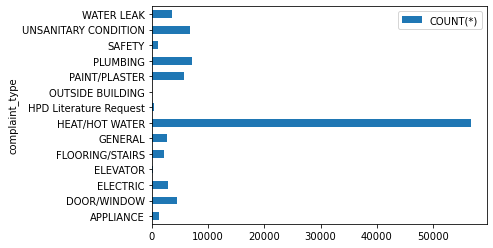

In [44]:
# Graph the number of calls for each housing issue
plt.figure(figsize = (12,6), dpi=100)
calls_by_issue.plot.barh(x="complaint_type")


### EX 8: Working with aggregate functions

Create a `query` to pass to `read_sql()` that will get `month`, `total precipitation (prcp)` for each month, and the `MAX, MIN` value of `tmax, tmin` respectively `by month` from `weather` table.

In [48]:
query = ''' SELECT month, MAX(tmax), MIN(tmin), SUM(prcp) FROM weather GROUP BY month'''

In [49]:
weather_by_month = pd.read_sql(query, engine)
weather_by_month

,month,MAX(tmax),MIN(tmin),SUM(prcp)
0,December,61,9,2.21
1,February,78,16,5.83
2,January,61,5,2.18
3,March,62,27,5.17


### Joining Tables:

Tables in relational databases usually have `key` columns of `unique` record identifiers. This lets us build pipelines that `combin`e tables using SQL's `JOIN` operation, instead of having to combine data after importing it.

1.Use `dot` notation `(table.column)` when working with `multiple` tables

2.Default `join` only returns records whose key values appear in both tables

3.Make sure join keys are the `same data type` or nothing will match

### EX 9:

The records in `hpd311calls` often concern issues, like `leaks or heating problems`, that are exacerbated by `weather` conditions. In this exercise, you'll join weather data to call records along their common date columns to get everything in one data frame. You can assume these columns have the same data type.

1.Complete the `query` to join `weather` to `hpd311calls` by their `date` and `created_date` columns, respectively.

2.Query the database and assign the resulting data frame to `calls_with_weather`.

3.Print the first few rows of calls_with_weather to confirm all columns were joined.

In [50]:
query = """ SELECT * FROM hpd311calls JOIN weather ON hpd311calls.created_date == weather.date;"""

In [52]:
calls_with_weather = pd.read_sql(query, engine)
calls_with_weather.head()

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough,station,name,...,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7


### Joining and filtering

Just as you might not always want all the data in a single table, you might not want all columns and rows that result from a JOIN. In this exercise, you'll use SQL to refine a data import.

`Weather` exacerbates some housing problems more than others. Your task is to focus on `water leak` reports in `hpd311calls` and assemble a dataset that includes the day's `precipitation` levels from `weather` to see if there is any `relationship` between the two. The provided SQL gets all columns in `hpd311calls`, but you'll need to modify it to get the necessary weather column and `filter` rows with a `WHERE` clause.

### Ex 10:

1.Complete `query` to get the `prcp` column in `weather` and `join` `weather` to `hpd311calls` on their `date` and `created_date` columns, respectively and get only rows that have `'WATER LEAK'` as their `complaint_type`

2.Use read_sql() to load the results of the query into the leak_calls data frame.

In [54]:
query = """ SELECT hpd311calls.*, prcp 
            FROM hpd311calls 
            JOIN weather 
            ON hpd311calls.created_date = weather.date 
            WHERE complaint_type == "WATER LEAK"

"""

In [55]:
# Load query results into the leak_calls data frame
leak_calls = pd.read_sql(query, engine)

In [57]:
# View the data frame
leak_calls.head()

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough,prcp
0,38074305,01/01/2018,HPD,WATER LEAK,11212,1026 WILLMOHR STREET,17 BROOKLYN,BROOKLYN,0.0
1,38078748,01/01/2018,HPD,WATER LEAK,10458,2700 MARION AVENUE,07 BRONX,BRONX,0.0
2,38081097,01/01/2018,HPD,WATER LEAK,11221,192 MALCOLM X BOULEVARD,03 BROOKLYN,BROOKLYN,0.0
3,38077874,01/01/2018,HPD,WATER LEAK,11418,129-11 JAMAICA AVENUE,09 QUEENS,QUEENS,0.0
4,38081110,01/01/2018,HPD,WATER LEAK,11420,111-17 133 STREET,10 QUEENS,QUEENS,0.0


### Ex 11: Joining, filtering, and aggregating

In this exercise, you'll use what you've learned to assemble a dataset to investigate `how the number of heating complaints to New York City's 311 line varies with temperature`.

In addition to the `hpd311calls` table, `data.db` has a `weather` table with daily `high and low` temperature readings for NYC. We want to get each day's `count` of `heat/hot water` calls with `temperatures` joined in. This can be done in one query, which we'll build in parts.

1.Complete the `query` to get `created_date` and `counts` of records whose `complaint_type` is `HEAT/HOT WATER` from `hpd311calls` `by date`.

2.Create a data frame,df, containing the results of the query.

3.`Modify` the `query` to join `tmax` and `tmin` from the `weather` table. (There is only one record per date in weather, so we do not need SQL's MAX and MIN functions here.) Join the tables on `created_date` in `hpd311calls` and `date` in `weather`.

In [60]:
query = ''' SELECT hpd311calls.created_date, COUNT(*) 
            FROM hpd311calls 
            WHERE hpd311calls.complaint_type == 'HEAT/HOT WATER' 
            GROUP BY hpd311calls.created_date'''

In [61]:
# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
df.head()

,created_date,COUNT(*)
0,01/01/2018,4597
1,01/02/2018,4362
2,01/03/2018,3045
3,01/04/2018,3374
4,01/05/2018,4333


In [62]:
query = ''' SELECT hpd311calls.created_date, weather.tmax, weather.tmin, COUNT(*) 
            FROM hpd311calls 
            JOIN weather
            ON hpd311calls.created_date = weather.date
            WHERE hpd311calls.complaint_type == 'HEAT/HOT WATER' 
            GROUP BY hpd311calls.created_date'''

In [63]:
# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
df.head()

,created_date,tmax,tmin,COUNT(*)
0,01/01/2018,19,7,4597
1,01/02/2018,26,13,4362
2,01/03/2018,30,16,3045
3,01/04/2018,29,19,3374
4,01/05/2018,19,9,4333
